In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [5]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Checking for Missing values

In [7]:
df.info()
#we can see there are no null counts in the columns as total enteries are equal to the per column enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()
#the null value count in each column is zero,hence no null values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data attributes description

        client data attributes(where categorical specifics are not known its labelled as unknown)
        1 age: Numerical values
        2 job: categorical data about types of job
        3 marital: married,single or divorced
        4 education : categorical data about the level of education (primary,secondary or tertiary)
        5 default : has any credit in default
        6 balance : numerical data about cash balance in the account
        7 housing : does have housing loan?
        8 loan : does have personal loan?
        communication details with client detail
        9 contact : categorical data about mode of communication
        10 day : last contact day of the week
        11 month : last contact month
        12 duration : total seconds spend on marketing the campaign
        Other
        13 campaign : no of time the client was contacted
        14 pdays : days that have passed since the contact
        15 previous : number of contacts performed before this campaign for this client
        16 poutcome : was the marketing communication effective?
        17 deposit : if their is any deposit?     

# Exploratory Data Analysis

we visualize the job category in dataset

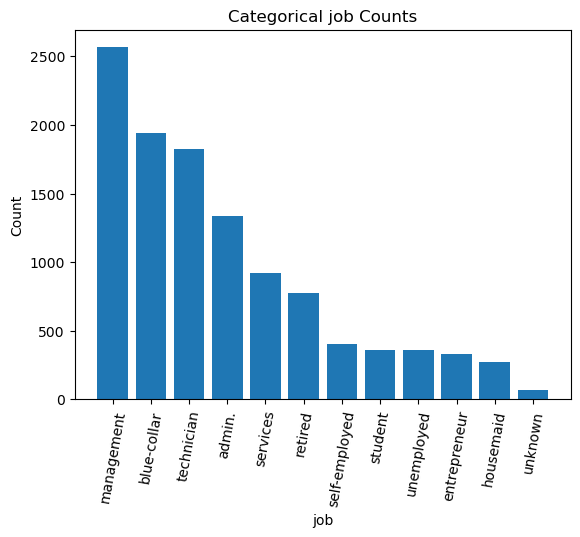

In [11]:
cat_job = df['job'].value_counts()
plt.bar(cat_job.index,cat_job.values)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Categorical job Counts')
plt.xticks(rotation=80)
plt.show()

Creating visual tables for all the catergorical columns combined in one code

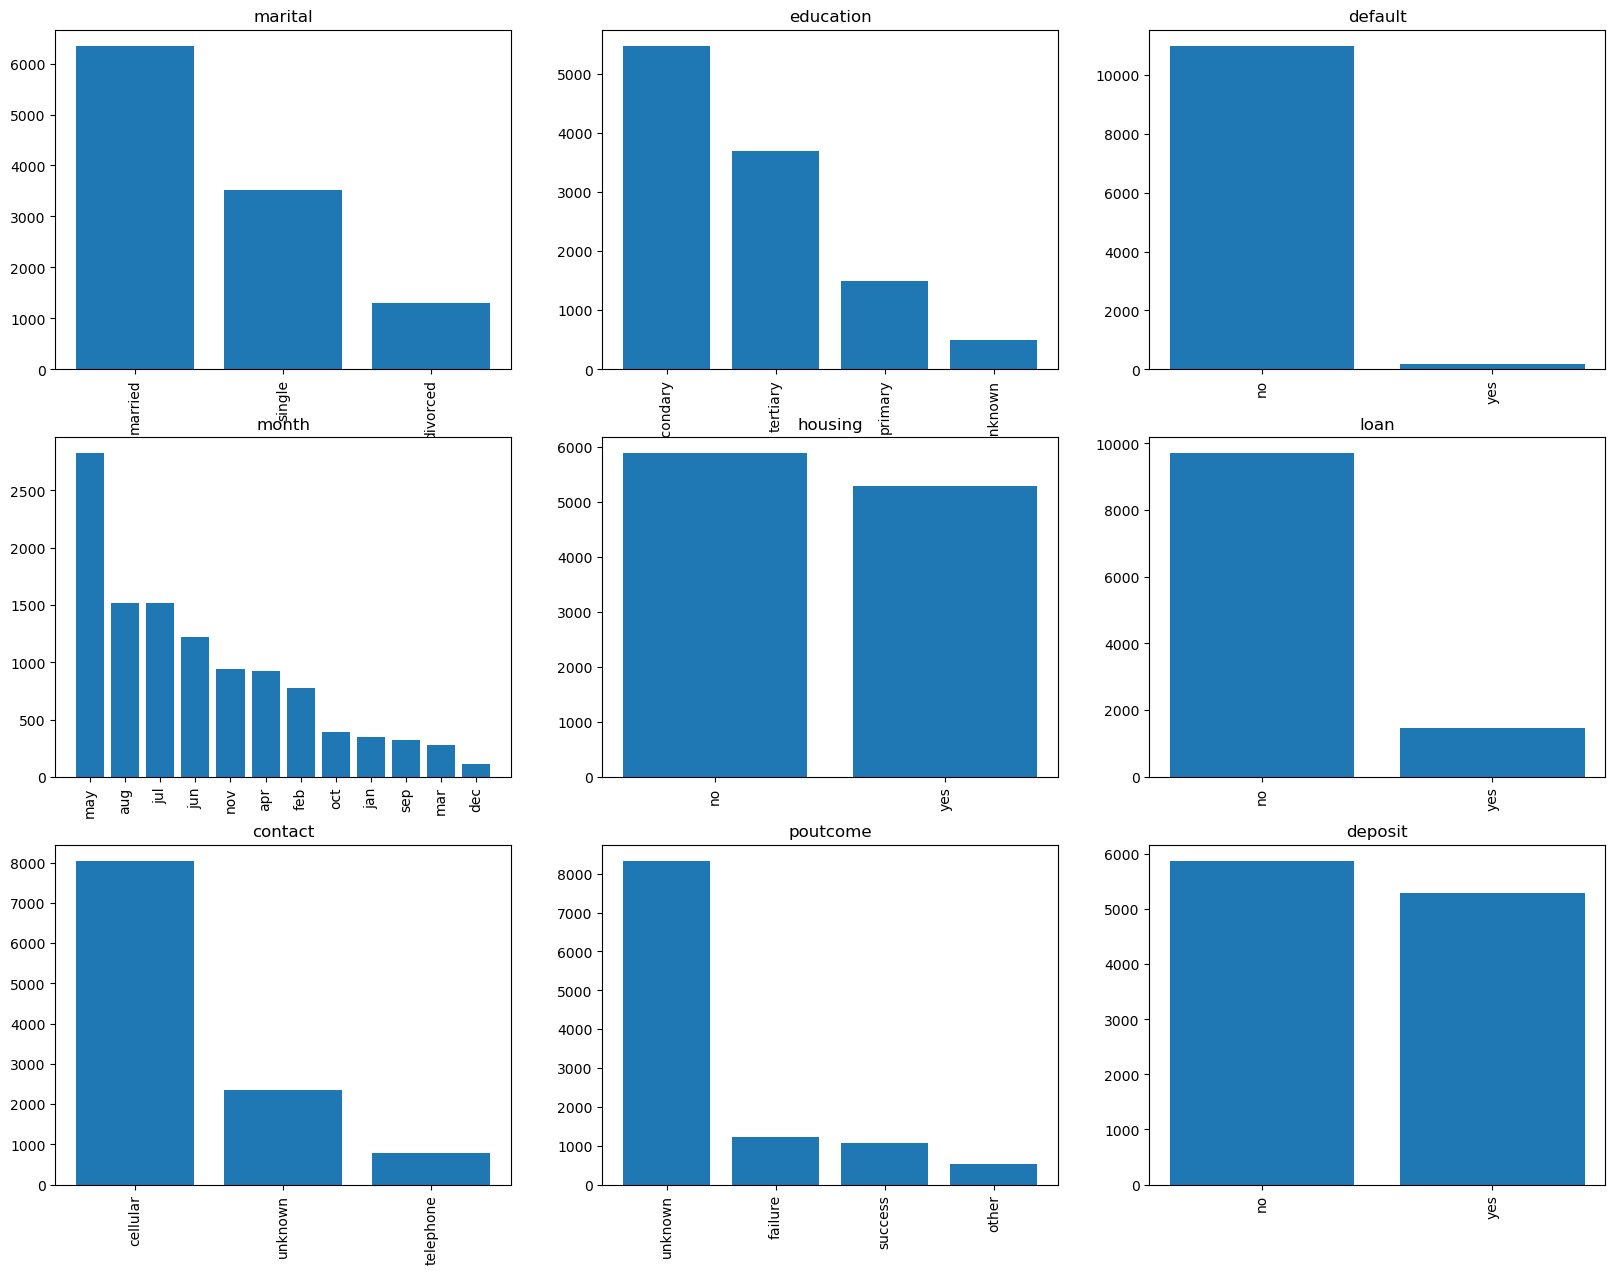

In [12]:
cat_columns = ['marital','education','default','month','housing','loan','contact','poutcome','deposit']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

we use heatmap to visualize the co-relation between numeric features

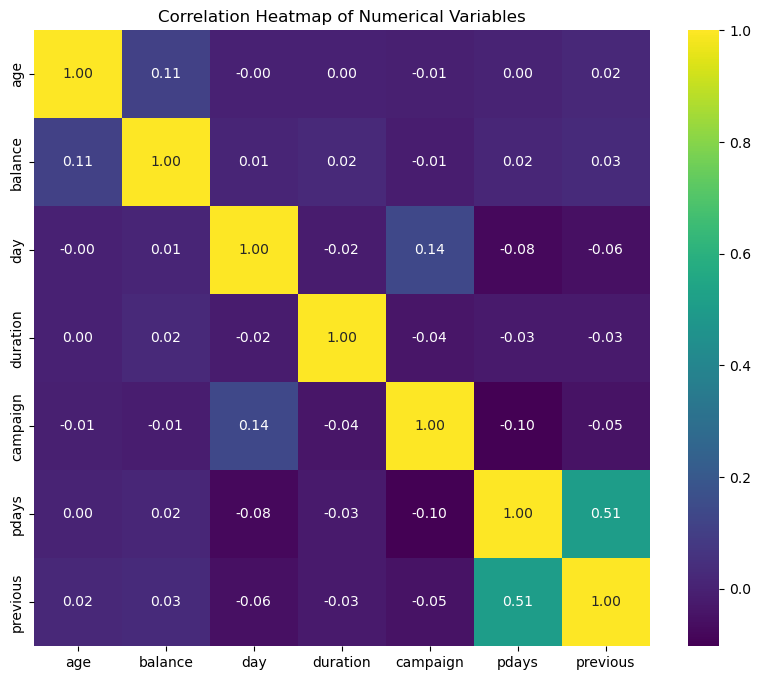

In [55]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap= 'viridis', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

we use stackedbar for interpreting the relation of education and Poutcome

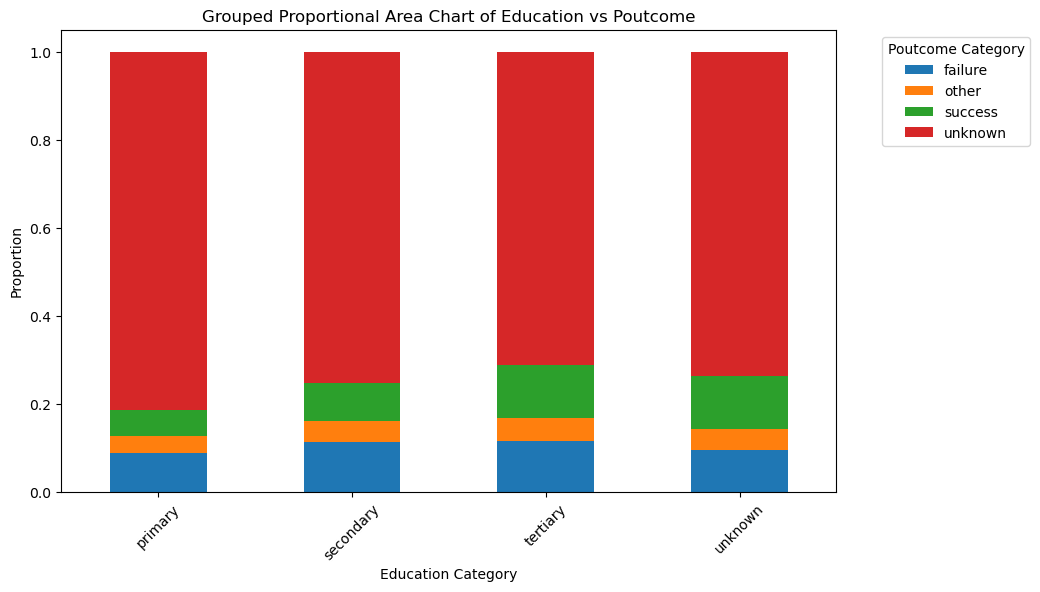

In [73]:
proportions = df.groupby(['education', 'poutcome']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Education Category')
plt.ylabel('Proportion')
plt.title('Grouped Proportional Area Chart of Education vs Poutcome')
plt.legend(title='Poutcome Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Find the relation of age with poutcome

In [75]:
#As age is a numerical data we try to create bins for it 
df['Age_1']=pd.qcut(df['age'], q=4)
age_labels = ['A1', 'A2', 'A3', 'A4']
df['age_labels'] = pd.qcut(df['age'],q=[0, .25, .50, .75, 1],labels=age_labels)
df['age_labels'].head()

0    A4
1    A4
2    A3
3    A4
4    A4
Name: age_labels, dtype: category
Categories (4, object): ['A1' < 'A2' < 'A3' < 'A4']

In [78]:
df['Age_1'].value_counts()

(17.999, 32.0]    2980
(32.0, 39.0]      2889
(49.0, 95.0]      2665
(39.0, 49.0]      2628
Name: Age_1, dtype: int64

In [76]:
#as we can see new columns are added now we can use it for analysis
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_1,age_labels
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"(49.0, 95.0]",A4
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"(49.0, 95.0]",A4
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"(39.0, 49.0]",A3
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(49.0, 95.0]",A4
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(49.0, 95.0]",A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(32.0, 39.0]",A2
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(32.0, 39.0]",A2
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(17.999, 32.0]",A1
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(39.0, 49.0]",A3


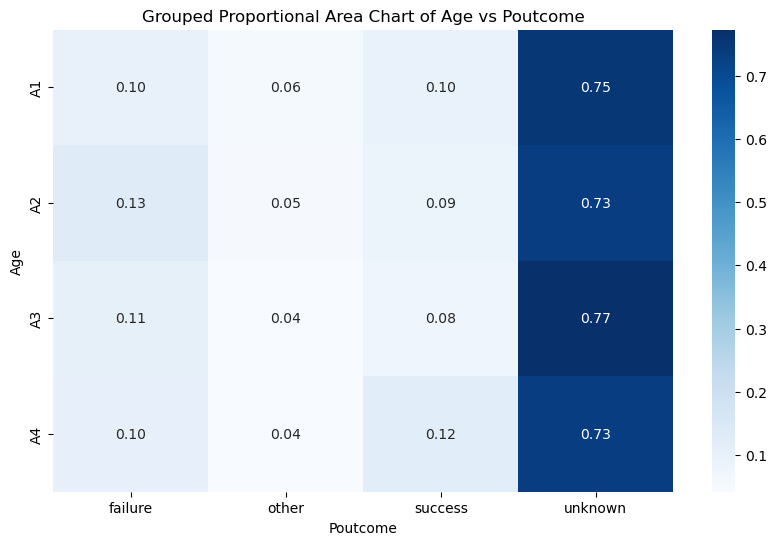

In [77]:
ct = pd.crosstab(df['age_labels'], df['poutcome'], normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', cbar=True, fmt='.2f')
plt.xlabel('Poutcome')
plt.ylabel('Age')
plt.title('Grouped Proportional Area Chart of Age vs Poutcome')
plt.show()

Visualizing occupation that has most active balance

In [81]:
import plotly.express as px
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

Finding relation by Visualizing average time campgain impacted the deposit

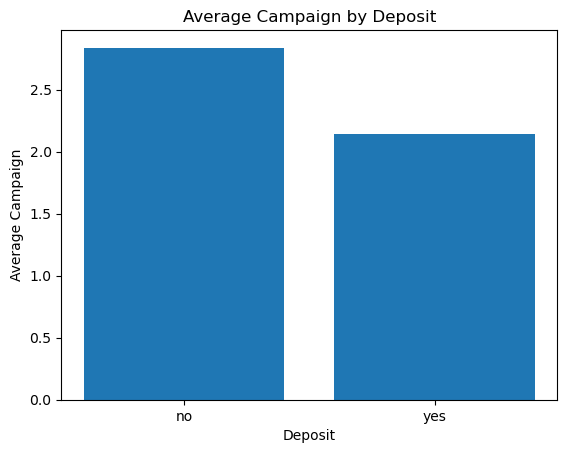

In [88]:
average_campaign_by_deposit = df.groupby('deposit')['campaign'].mean()
plt.bar(average_campaign_by_deposit.index, average_campaign_by_deposit.values)
plt.xlabel('Deposit')
plt.ylabel('Average Campaign')
plt.title('Average Campaign by Deposit')
plt.show()